## Clustering Cryptocurrencies

In [81]:
# Initial imports
import pandas as pd
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [65]:
# Load the crypto_data.csv file
crypto_data = pd.read_csv(Path("crypto_data.csv"), index_col=0)
crypto_data.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [66]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1252 non-null   object 
 1   Algorithm        1252 non-null   object 
 2   IsTrading        1252 non-null   bool   
 3   ProofType        1252 non-null   object 
 4   TotalCoinsMined  744 non-null    float64
 5   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 59.9+ KB


#### Cleaning the data

In [67]:
# Convert 'TotalCoinSupply' to numeric
crypto_data['TotalCoinSupply'] = pd.to_numeric(crypto_data['TotalCoinSupply'], errors='coerce')
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1252 non-null   object 
 1   Algorithm        1252 non-null   object 
 2   IsTrading        1252 non-null   bool   
 3   ProofType        1252 non-null   object 
 4   TotalCoinsMined  744 non-null    float64
 5   TotalCoinSupply  1249 non-null   float64
dtypes: bool(1), float64(2), object(3)
memory usage: 59.9+ KB


In [68]:
# Discard all cryptocurrencies that are not being traded
crypto_data = crypto_data[crypto_data['IsTrading'] == True]
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   IsTrading        1144 non-null   bool   
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1141 non-null   float64
dtypes: bool(1), float64(2), object(3)
memory usage: 54.7+ KB


In [69]:
# Remove the 'IsTrading' column
crypto_data = crypto_data.drop(columns=['IsTrading'])
crypto_data.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
365,365Coin,X11,PoW/PoS,NaN,2.300000e+09
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
611,SixEleven,SHA-256,PoW,NaN,6.110000e+05
808,808,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00


In [70]:
# Remove all rows with missing values
crypto_data = crypto_data.dropna()
crypto_data.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
808,808,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07


In [71]:
# Filter for cryptocurrencies that have been mined
crypto_data = crypto_data[crypto_data['TotalCoinsMined'] > 0]
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(3)
memory usage: 24.9+ KB


#### Prepping the data for ML

In [72]:
# Remove the 'CoinName' column
coin_names = crypto_data['CoinName']
crypto_data = crypto_data.drop(columns=['CoinName'])
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [73]:
# Use dummy variables for text columns
X = pd.get_dummies(crypto_data, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(532, 98)


#### Dimensionality Reduction

In [76]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(X_scaled)
print(crypto_pca.shape)

(532, 74)


PCA reduced the features from 98 to 74 to account for 90% of the variability.

In [79]:
# Further reduce the dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
crypto_tsne = tsne.fit_transform(crypto_pca)
print(crypto_tsne.shape)

(532, 2)


t-SNE reduced the features from 74 to 2

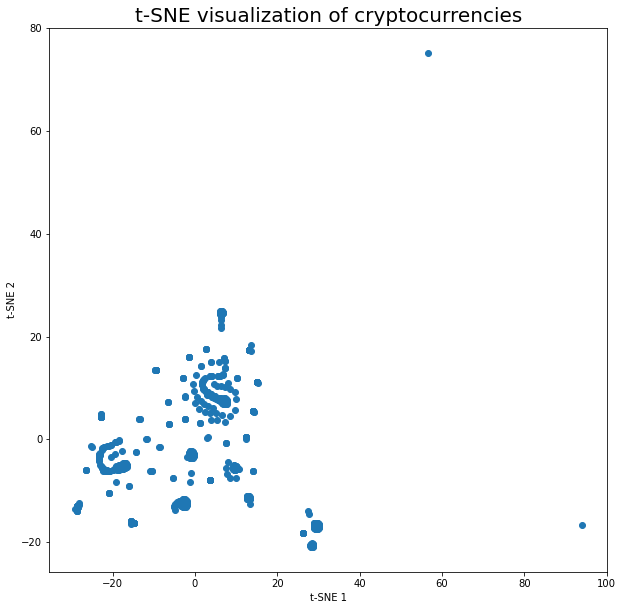

In [117]:
# Visualize the results from t-SNE
plt.figure(num=None, figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(crypto_tsne[:, 0], crypto_tsne[:, 1])
plt.title('t-SNE visualization of cryptocurrencies', fontdict={'fontsize': 20})
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

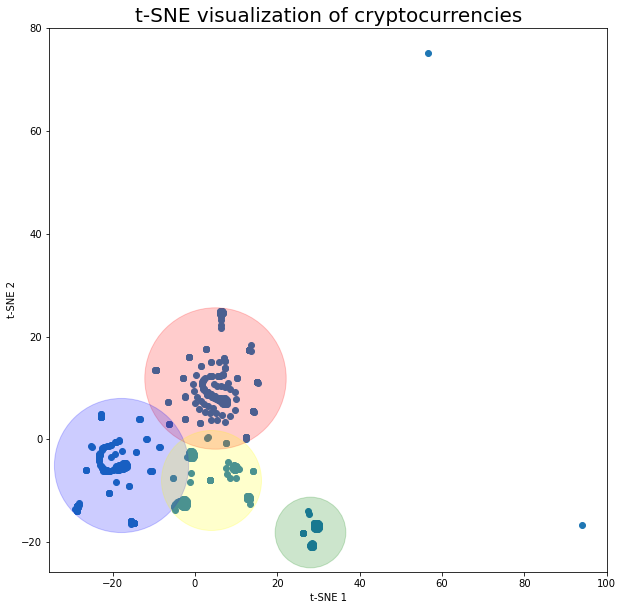

In [116]:
plt.figure(num=None, figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(crypto_tsne[:, 0], crypto_tsne[:, 1])
plt.title('t-SNE visualization of cryptocurrencies', fontdict={'fontsize': 20})
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.scatter(5, 12, color = 'red', marker = 'o', s = 20000, alpha = 0.2)
plt.scatter(-18, -5, color = 'blue', marker = 'o', s = 18000, alpha = 0.2)
plt.scatter(4, -8, color = 'yellow', marker = 'o', s = 10000, alpha = 0.2)
plt.scatter(28, -18, color = 'green', marker = 'o', s = 5000, alpha = 0.2)
plt.show()

I've highlighted 4 main clusters that I see in red, blue, yellow, and green circles. However, each of these large clusters contain at least one smaller cluster. For example, I can easily see 4 distinct clusters within the yellow circle.


#### k-means clustering

C:\Users\Public\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<AxesSubplot:xlabel='k'>

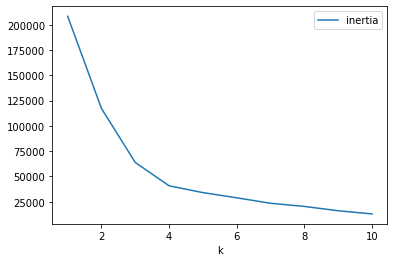

In [123]:
# Find the best value for k using the elbow curve

inertia = []
k = list(range(1, 11))
for i in k:
    km =  KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_tsne)
    inertia.append(km.inertia_)

elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot(x='k', y='inertia', kind='line')

The elbow occurs at k=4 (as predicted by visual inspection).

In [124]:
# Perform clustering with k=4
km = KMeans(n_clusters=4, random_state=0)
km.fit(crypto_tsne)
predictions = km.predict(crypto_tsne)

Text(0, 0.5, 't-SNE 2')

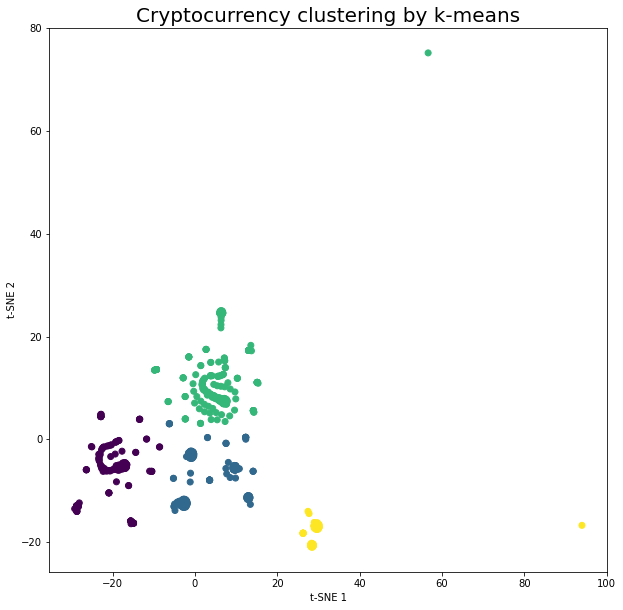

In [127]:
# Visualize the results
plt.figure(num=None, figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(crypto_tsne[:, 0], crypto_tsne[:, 1], c = predictions)
plt.title('Cryptocurrency clustering by k-means', fontdict={'fontsize': 20})
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

#### Recommendations

My initial guess for clustering based on visualization after dimensionality reduction is largely supported by k-means clustering. Based on this data, it would be appropriate to cluster the cryptocurrencies into 4 major categories (as shown above).